# Exploración de archivos

In [1]:
import sys
sys.path.insert(0, '..')
from utils.cargar import df_caso
from utils.preprocesamiento import process_df, procesar_adela

caso = 'adela'
df = df_caso(caso)

df = procesar_adela(df)
df = df[df['opt_left'] == 'Producir el alimento contra déficit vitamínico']

op_left = 'Producir el alimento contra déficit (1)'
op_right = 'Resguardar tradiciones identitarias (6)'

df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time,curso
id,,,,,,,,,,,,,
26276,4234,NaN,M,1,"Continuando la pregunta anterior, Adela se enc...",Producir el alimento contra déficit vitamínico,Resguardar las tradiciones identitarias,6,2,Adela debería priorizar la salud de las person...,2,2021-11-10T21:08:01.501Z,2021.CD2201
26277,4228,NaN,M,1,"Continuando la pregunta anterior, Adela se enc...",Producir el alimento contra déficit vitamínico,Resguardar las tradiciones identitarias,6,5,Resguardar la identidad del pueblo originario ...,2,2021-11-10T21:08:16.214Z,2021.CD2201
26279,4239,NaN,M,1,"Continuando la pregunta anterior, Adela se enc...",Producir el alimento contra déficit vitamínico,Resguardar las tradiciones identitarias,6,1,creo que las creencias religiosas o tradicione...,2,2021-11-10T21:09:20.565Z,2021.CD2201
26280,4223,NaN,M,1,"Continuando la pregunta anterior, Adela se enc...",Producir el alimento contra déficit vitamínico,Resguardar las tradiciones identitarias,6,3,El objetivo del proyecto no es mutuamente excl...,2,2021-11-10T21:09:26.514Z,2021.CD2201
26281,4220,NaN,M,1,"Continuando la pregunta anterior, Adela se enc...",Producir el alimento contra déficit vitamínico,Resguardar las tradiciones identitarias,6,5,Se deben preservar las tradiciones de los pueb...,2,2021-11-10T21:09:52.525Z,2021.CD2201


In [2]:
print(df['title'].unique()[-1])
print('1\t'+df['opt_left'].unique()[-1])
print(str(df['max_num'].unique()[-1])+'\t'+df['opt_right'].unique()[-1])

[Acordar entre todas/os la respuesta, discutiendo vía chat de forma anónima, aspectos ya considerados u otros no considerados en las preguntas anteriores. Es decir, todos deben elegir el mismo valor numérico en la respuesta, aun cuando cada uno pueda proporcionar argumentos de justificación diferentes] [Justificación de mínimo 40 palabras] Considerando la futura población beneficiada por este nuevo alimento y los efectos generados a las tradiciones identitarias del pueblo originario del caso, Adela debería priorizar... :
1	Producir el alimento contra déficit vitamínico
7	Resguardar las tradiciones identitarias


In [3]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('\nCantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id         0
team_id      4664
gender          0
df              0
title           0
opt_left        0
opt_right       0
max_num         0
sel             0
comment        26
phase           0
time            0
curso           0
dtype: int64


Cantidad de valores únicos por columna:


user_id      1865
team_id       446
gender          3
df              2
title          40
opt_left        1
opt_right       1
max_num         2
sel             7
comment      6060
phase           7
time         6472
curso           3
dtype: int64

In [4]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 6446


## Exploración básica del texto

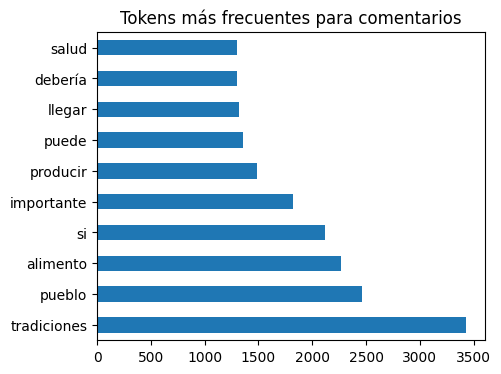

In [5]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

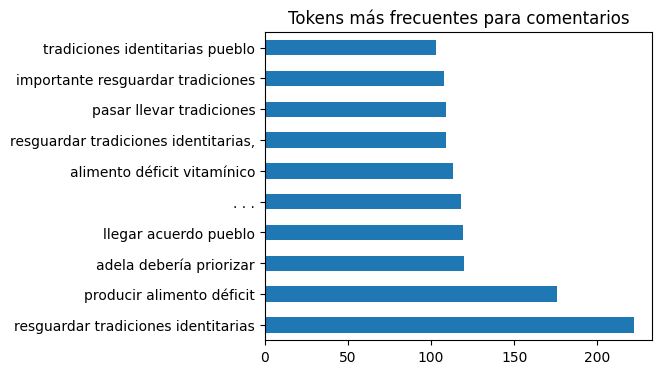

In [6]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

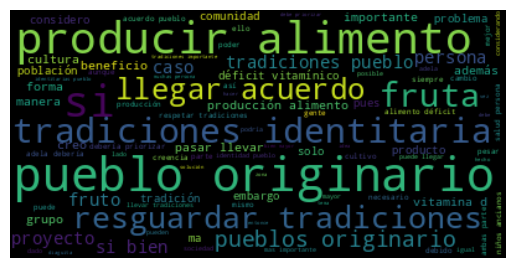

In [7]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))

## Análisis exploratorio

---

In [8]:
from utils.preprocesamiento import delete_non_string_rows

df = delete_non_string_rows(df,'comment')

0 rows found with non string elements for column comment (0.00%)


In [9]:
from utils.exploracion import comment_length

lengths = comment_length(df,'comment')
lengths_nsw = comment_length(df,'comment',ignore=stopwords.words('spanish'))

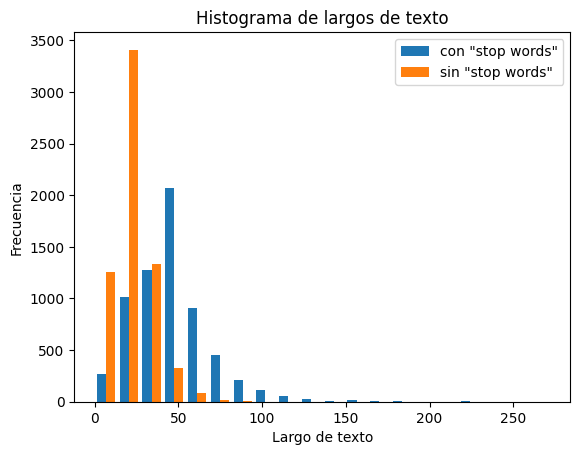

In [10]:
import matplotlib.pyplot as plt

plt.hist([lengths, lengths_nsw], bins=20, color=['tab:blue', 'tab:orange'], label=['con "stop words"', 'sin "stop words"'])

plt.xlabel('Largo de texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de largos de texto')
plt.legend()
plt.show()

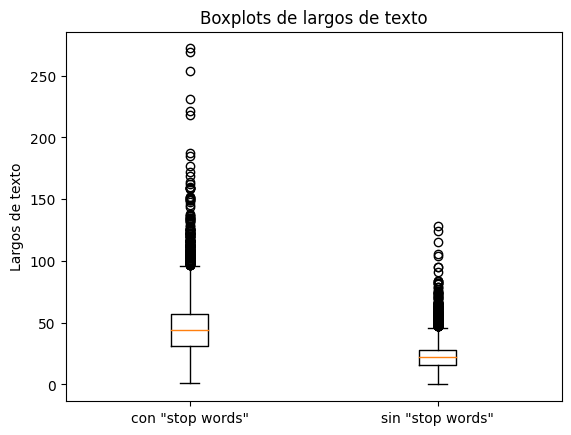

In [11]:
fig, ax = plt.subplots()
ax.boxplot([lengths, lengths_nsw])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['con "stop words"', 'sin "stop words"'])
ax.set_title('Boxplots de largos de texto')
plt.show()

In [12]:
from utils.exploracion import basic_stats, print_basic_stats

In [13]:
print('Con "stop words"')
print_basic_stats(lengths)
print('\nSin "stop words"')
print_basic_stats(lengths_nsw)

Con "stop words"
Media: 46.4477195159789
Desviación estándar: 23.464848451611676
Mediana: 44.0
Mínimo: 1
Máximo: 272

Sin "stop words"
Media: 23.10300961836798
Desviación estándar: 11.638531456359017
Mediana: 22.0
Mínimo: 0
Máximo: 128


---

Condicionamiento por valor seleccionado

In [14]:
df['sel'].value_counts()

sel
3    1884
2    1592
4    1164
5     785
1     695
6     302
7      24
Name: count, dtype: int64

Se observan valores fuera de rango, por el momento se eliminarán estos valores

In [15]:
df = df.drop(df[df['sel'] > 6].index)

In [16]:
toks_1 = most_common(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_2 = most_common(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_3 = most_common(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_4 = most_common(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_5 = most_common(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_6 = most_common(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish')+['si', caso])

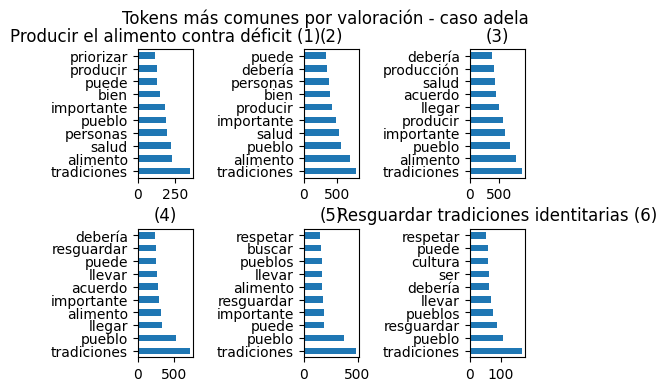

In [17]:
fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(wspace=2, hspace=0.4)

plot_token_frequency(toks_1,op_left,ax=axs[0,0])
plot_token_frequency(toks_2,'(2)',ax=axs[0,1])
plot_token_frequency(toks_3,'(3)',ax=axs[0,2])
plot_token_frequency(toks_4,'(4)',ax=axs[1,0])
plot_token_frequency(toks_5,'(5)',ax=axs[1,1])
plot_token_frequency(toks_6,op_right,ax=axs[1,2])
fig.suptitle("Tokens más comunes por valoración - caso {}".format(caso));

In [18]:
lengths_1 = comment_length(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish'))
lengths_2 = comment_length(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish'))
lengths_3 = comment_length(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish'))
lengths_4 = comment_length(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish'))
lengths_5 = comment_length(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish'))
lengths_6 = comment_length(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish'))

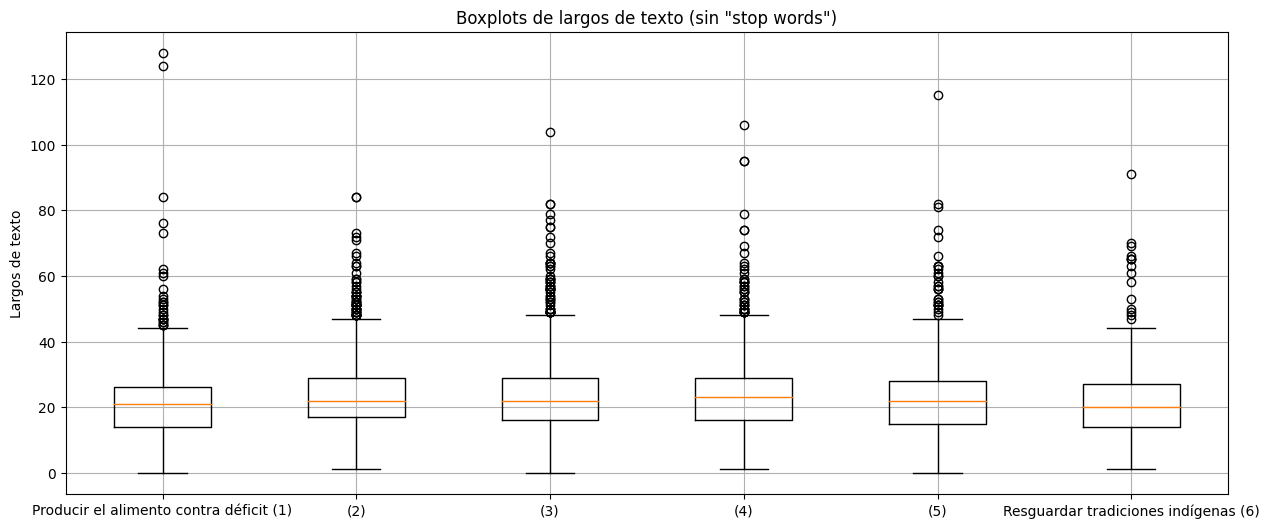

In [19]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
ax.boxplot([lengths_1, lengths_2, lengths_3, lengths_4, lengths_5, lengths_6])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['Producir el alimento contra déficit (1)', '(2)', '(3)', '(4)', '(5)', 'Resguardar tradiciones indígenas (6)'])
ax.set_title('Boxplots de largos de texto (sin "stop words")')
plt.grid()
plt.show()

In [20]:
from utils.exploracion import print_table_md

dic = basic_stats(lengths_1)

# headers = ['valoración'] + list(dic.keys())
headers = ['valoración', 'media', 'mediana', 'desviación estándar', 'mínimo', 'máximo']
data = [['(1)'] + list(dic.values())]
data.append(['(2)'] + list(basic_stats(lengths_2).values()))
data.append(['(3)'] + list(basic_stats(lengths_3).values()))
data.append(['(4)'] + list(basic_stats(lengths_4).values()))
data.append(['(5)'] + list(basic_stats(lengths_5).values()))
data.append(['(6)'] + list(basic_stats(lengths_6).values()))

print_table_md(headers, data)

| valoración | media | mediana | desviación estándar | mínimo | máximo |
| --- | --- | --- | --- | --- | --- |
| (1) | 21.805755395683452 | 21.0 | 12.462939419003506 | 0 | 128 |
| (2) | 23.17211055276382 | 22.0 | 10.94208261381153 | 1 | 84 |
| (3) | 23.32908704883227 | 22.0 | 11.33531500478991 | 0 | 104 |
| (4) | 23.745704467353953 | 23.0 | 11.853006075509391 | 1 | 106 |
| (5) | 23.0828025477707 | 22.0 | 12.171472223801464 | 0 | 115 |
| (6) | 22.211920529801326 | 20.0 | 12.707409983824231 | 1 | 91 |


---

### Condicionamiento por fases

In [21]:
df['phase'].value_counts()

phase
3    1707
2    1671
4    1643
1    1185
6     117
7      50
5      49
Name: count, dtype: int64

In [22]:
from utils.cargar import fase

df_ind1 = fase(df,'Ind1',caso)

df_ind1['phase'].value_counts()

phase
2    1671
1      36
Name: count, dtype: int64

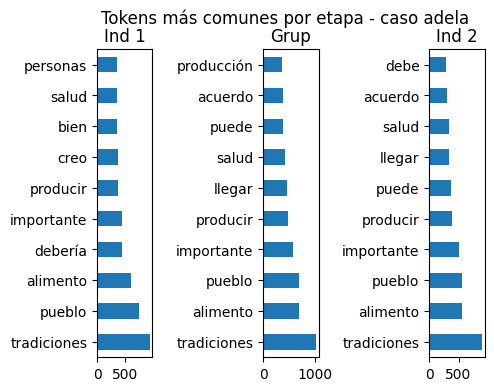

In [23]:
toks_ind1 = most_common(fase(df,'Ind1',caso),'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_grup = most_common(fase(df,'Grup',caso),'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_ind2 = most_common(fase(df,'Ind2',caso),'comment',ignore=stopwords.words('spanish')+['si', caso])

fig, axs = plt.subplots(1, 3)
plt.subplots_adjust(wspace=2, hspace=0.4)

plot_token_frequency(toks_ind1,'Ind 1',ax=axs[0])
plot_token_frequency(toks_grup,'Grup',ax=axs[1])
plot_token_frequency(toks_ind2,'Ind 2',ax=axs[2])
fig.suptitle("Tokens más comunes por etapa - caso {}".format(caso));

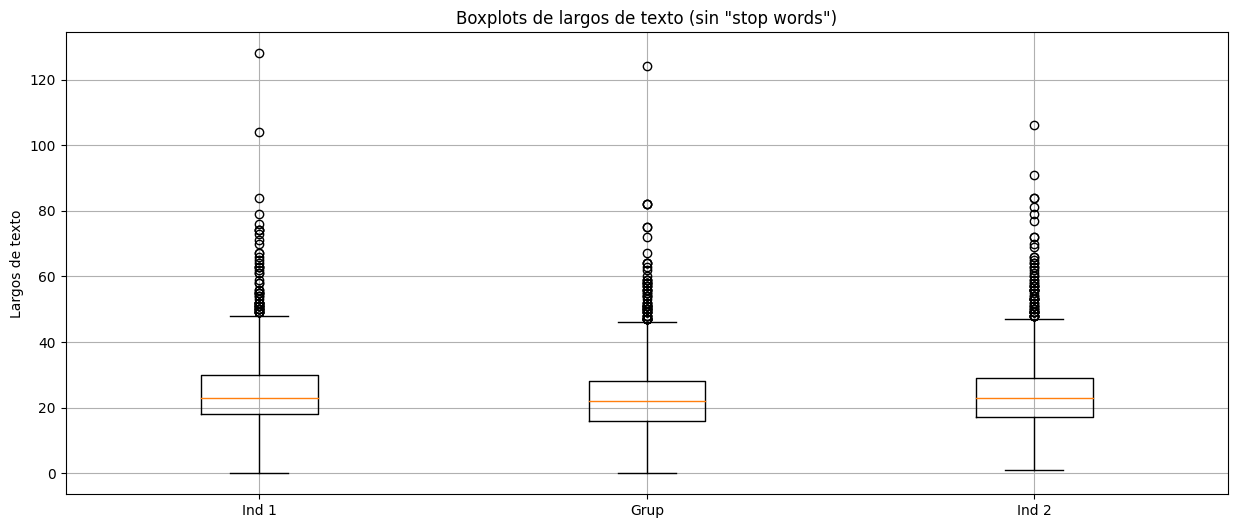

In [24]:
lengths_ind1 = comment_length(fase(df,'Ind1',caso),'comment',ignore=stopwords.words('spanish'))
lengths_grup = comment_length(fase(df,'Grup',caso),'comment',ignore=stopwords.words('spanish'))
lengths_ind2 = comment_length(fase(df,'Ind2',caso),'comment',ignore=stopwords.words('spanish'))

plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
ax.boxplot([lengths_ind1, lengths_grup, lengths_ind2])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['Ind 1', 'Grup', 'Ind 2'])
ax.set_title('Boxplots de largos de texto (sin "stop words")')
plt.grid()
plt.show()

In [25]:
dic = basic_stats(lengths_ind1)

headers = ['valoración', 'media', 'mediana', 'desviación estándar', 'mínimo', 'máximo']
data = [['Ind 1'] + list(dic.values())]
data.append(['Grup'] + list(basic_stats(lengths_grup).values()))
data.append(['Ind 2'] + list(basic_stats(lengths_ind2).values()))

print_table_md(headers, data)

| valoración | media | mediana | desviación estándar | mínimo | máximo |
| --- | --- | --- | --- | --- | --- |
| Ind 1 | 24.54422964264792 | 23.0 | 11.570152565197443 | 0 | 128 |
| Grup | 23.2380694143167 | 22.0 | 10.993107866652167 | 0 | 124 |
| Ind 2 | 23.73145933014354 | 23.0 | 11.738488844753135 | 1 | 106 |


### Nube de palabras por elección

In [26]:
df.loc[(df['sel']==2) | (df['sel']==3),'sel'] = 1
df.loc[(df['sel']==4) | (df['sel']==5),'sel'] = 6

Nube de palabras para elección 'Producir el alimento contra déficit (1)'


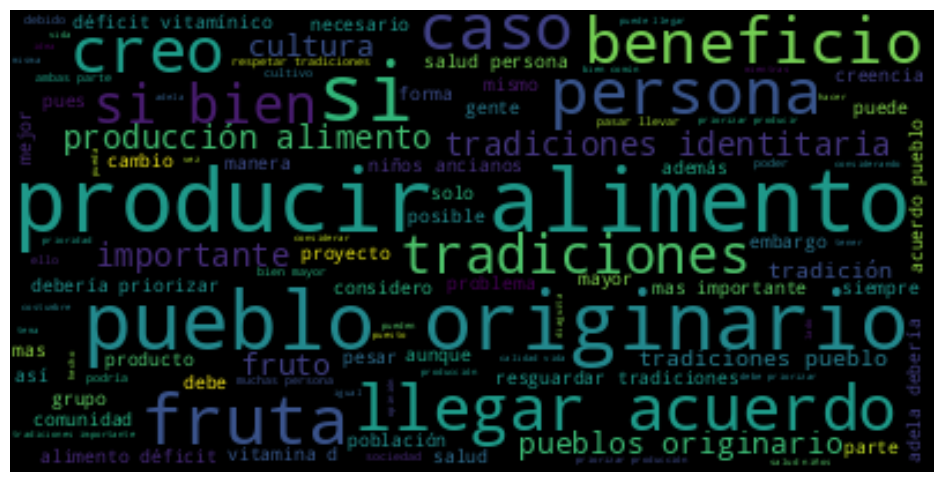

In [27]:
print("Nube de palabras para elección '{}'".format(op_left))
wordcloud_from_column(df[df['sel']==1],'comment',ignore=stopwords.words('spanish'))

Nube de palabras para elección 'Resguardar tradiciones identitarias (6)'


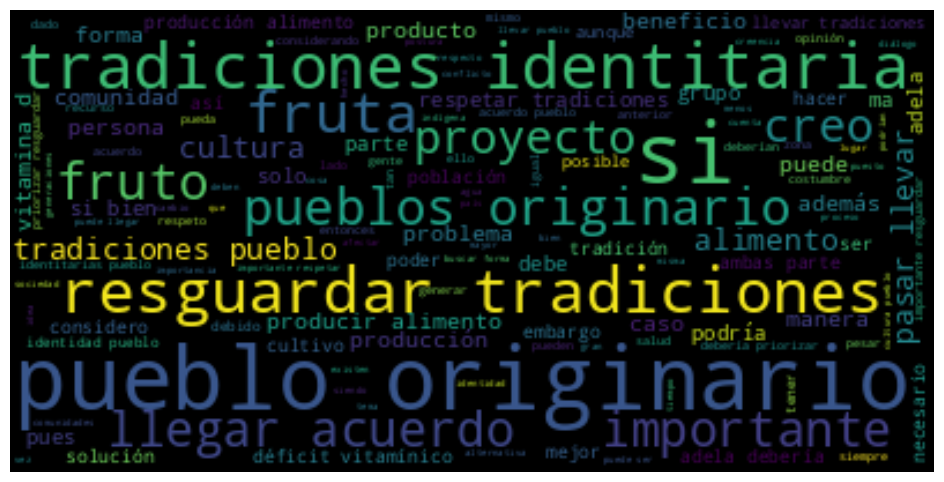

In [28]:
print("Nube de palabras para elección '{}'".format(op_right))
wordcloud_from_column(df[df['sel']==6],'comment',ignore=stopwords.words('spanish'))